<img src = 'https://github.com/Rakesh00966/Football-injury/blob/main/Fball%20injury.jpeg?raw=true'>

# FootBall injury

* This notebook speaks about the football injuries.
* Performs EDA analysis on theis dataset to determine which category of players are more effected due to these injuries. The categories like age, stress, sleep time, weight, height etc......
* Before starting lets analyse the features of dataset




# Data Overview

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [85]:
import warnings
warnings.filterwarnings('ignore')

In [86]:
df = pd.read_csv('/content/data.csv')
df.head(6)

,Age,Height_cm,Weight_kg,Position,Training_Hours_Per_Week,Matches_Played_Past_Season,Previous_Injury_Count,Knee_Strength_Score,Hamstring_Flexibility,Reaction_Time_ms,Balance_Test_Score,Sprint_Speed_10m_s,Agility_Score,Sleep_Hours_Per_Night,Stress_Level_Score,Nutrition_Quality_Score,Warmup_Routine_Adherence,Injury_Next_Season,BMI
0,22,173,64,Midfielder,11.575308,36,1,77.460279,79.115738,284.487853,91.212476,5.874630,77.599705,8.238293,46.616415,81.472206,1,0,21.383942
1,18,170,67,Midfielder,12.275869,37,2,72.634442,82.541688,250.579249,87.294078,5.796269,94.418987,8.983737,49.368037,81.056677,1,0,23.183391
2,22,186,75,Forward,12.254896,12,2,77.064490,75.943631,269.119918,83.440688,5.731209,70.179176,7.229193,43.132808,64.877457,0,1,21.678807
3,20,172,62,Defender,9.006678,11,1,82.810232,73.878324,226.376412,87.591894,6.220212,83.473824,7.681029,51.528529,89.824744,1,0,20.957274
4,18,172,94,Midfielder,12.683668,10,2,76.772859,76.653043,229.021042,83.125161,5.385958,87.037256,6.728091,52.379718,71.569197,0,1,31.773932
5,23,189,89,Goalkeeper,10.262987,31,2,78.450720,80.927984,265.801623,81.106339,6.354870,86.418954,8.538027,39.929697,74.982476,1,0,24.915316


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         800 non-null    int64  
 1   Height_cm                   800 non-null    int64  
 2   Weight_kg                   800 non-null    int64  
 3   Position                    800 non-null    object 
 4   Training_Hours_Per_Week     800 non-null    float64
 5   Matches_Played_Past_Season  800 non-null    int64  
 6   Previous_Injury_Count       800 non-null    int64  
 7   Knee_Strength_Score         800 non-null    float64
 8   Hamstring_Flexibility       800 non-null    float64
 9   Reaction_Time_ms            800 non-null    float64
 10  Balance_Test_Score          800 non-null    float64
 11  Sprint_Speed_10m_s          800 non-null    float64
 12  Agility_Score               800 non-null    float64
 13  Sleep_Hours_Per_Night       800 non

**`📊 Feature Columns Explanation`**

*   **Age** – Player’s age (years). Older players may be more prone to injuries.

*   **Height_cm** – Player’s height in centimeters. Taller players may face different injury risks.

*   **Weight_kg** – Player’s weight in kilograms. Weight affects load on joints.

*   **Position** – Playing position (e.g., forward, defender, goalkeeper). Different positions have different physical demands.

*   **Training_Hours_Per_Week** – Average training workload per week. Too much or too little training can cause injuries.

*   **Matches_Played_Past_Season** – Number of matches played in the last season (indicator of workload/fatigue).

*   **Previous_Injury_Count** – How many injuries the player had before. Strong predictor for future injuries.

*   **Knee_Strength_Score** – Score measuring knee strength (likely from physiotherapy tests).

*   **Hamstring_Flexibility** – Flexibility level of hamstrings (important for sprinting & reducing strain injuries).

*   **Reaction_Time_ms** – Reaction speed in milliseconds (lower is better). Poor reaction may increase injury chances.

*   **Balance_Test_Score** – Score from balance tests (helps assess stability and injury prevention).

*   **Sprint_Speed_10m_s** – Speed over 10m sprint (m/s). Faster players might have higher muscle strain risk.

*   **Agility_Score** – Agility rating (quick directional changes). Good agility reduces injury risks.

*   **Sleep_Hours_Per_Night** – Average sleep duration. Lack of sleep = higher injury chance.

*   **Stress_Level_Score** – Stress level rating (mental/physical stress can impact injuries).

*   **Nutrition_Quality_Score** – Score showing quality of diet. Poor nutrition = higher injury risk.

*   **Warmup_Routine_Adherence** – How consistently player follows warm-up routine (important for prevention).

*   **BMI** – Body Mass Index (calculated from height & weight). High/low BMI may affect injury risk.

In [88]:
df.isnull().sum()

,0
Age,0
Height_cm,0
Weight_kg,0
Position,0
Training_Hours_Per_Week,0
Matches_Played_Past_Season,0
Previous_Injury_Count,0
Knee_Strength_Score,0
Hamstring_Flexibility,0
Reaction_Time_ms,0


# Exploratory Data Analysis

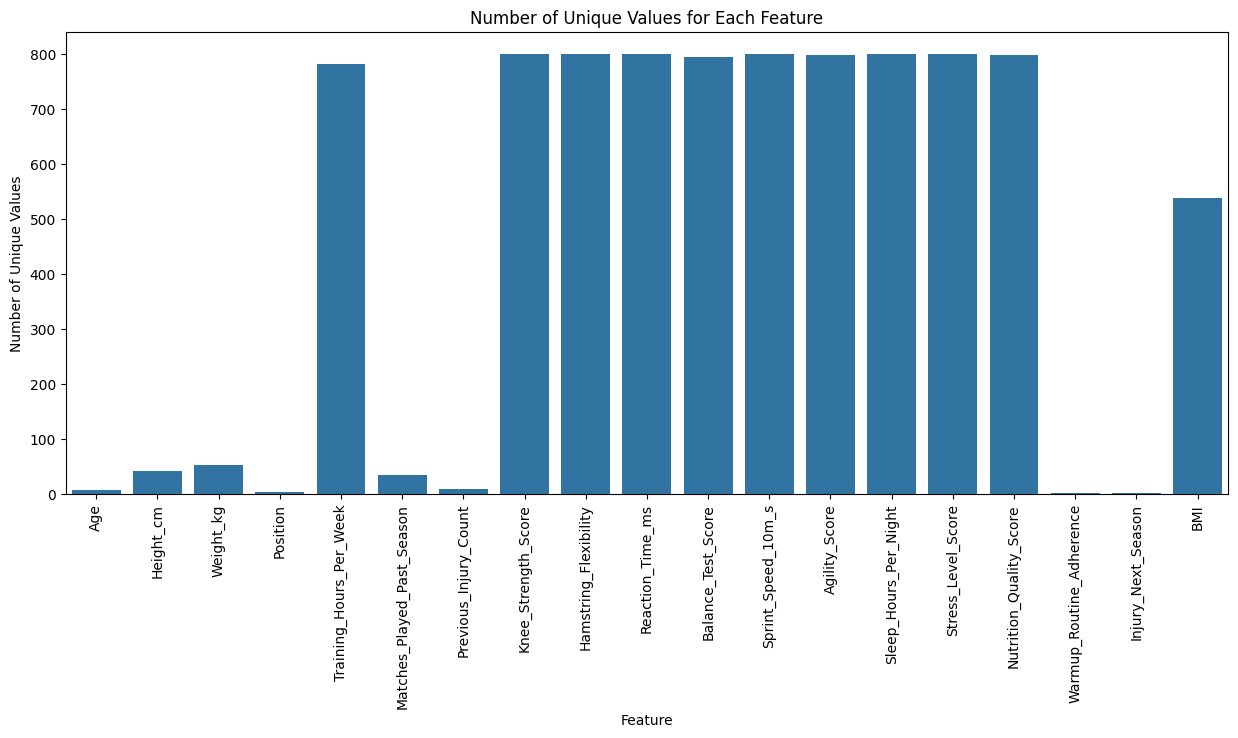

In [89]:
unique_val = df.nunique()
plt.figure(figsize=(15, 6))
sns.barplot(x=unique_val.index, y=unique_val.values)
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Number of Unique Values')
plt.title('Number of Unique Values for Each Feature')
plt.show()

In [90]:
for column in df.columns:
  print(f"{column}: Unique values :  {df[column].nunique()} type is {df[column].dtype}")
  print("=====================================================")

Age: Unique values :  7 type is int64
Height_cm: Unique values :  42 type is int64
Weight_kg: Unique values :  53 type is int64
Position: Unique values :  4 type is object
Training_Hours_Per_Week: Unique values :  781 type is float64
Matches_Played_Past_Season: Unique values :  35 type is int64
Previous_Injury_Count: Unique values :  9 type is int64
Knee_Strength_Score: Unique values :  800 type is float64
Hamstring_Flexibility: Unique values :  800 type is float64
Reaction_Time_ms: Unique values :  800 type is float64
Balance_Test_Score: Unique values :  794 type is float64
Sprint_Speed_10m_s: Unique values :  800 type is float64
Agility_Score: Unique values :  797 type is float64
Sleep_Hours_Per_Night: Unique values :  800 type is float64
Stress_Level_Score: Unique values :  800 type is float64
Nutrition_Quality_Score: Unique values :  798 type is float64
Warmup_Routine_Adherence: Unique values :  2 type is int64
Injury_Next_Season: Unique values :  2 type is int64
BMI: Unique values

We Have only one Object column that is position

# Univariate Analysis

In [91]:
def plot_hist(col,xlabel,bins,hue = 'Injury_Next_Season',ylabel='Frequency'):
  plt.figure(figsize=(16, 6))
  sns.histplot(data=df, x=col, hue=hue, kde=True,multiple='stack')
  plt.xlabel(xlabel,fontsize=12)
  plt.ylabel(ylabel,fontsize=12)
  plt.title(f'Distribution of {col}',fontsize = 15)
  plt.show()

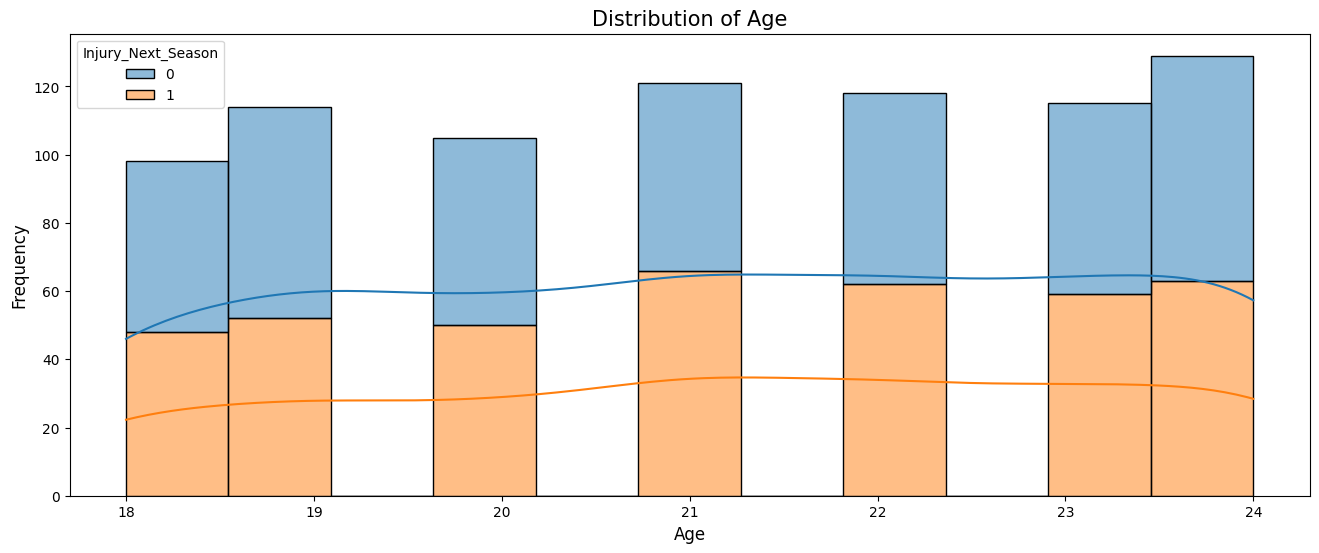

In [92]:
plot_hist('Age','Age',bins = 7)

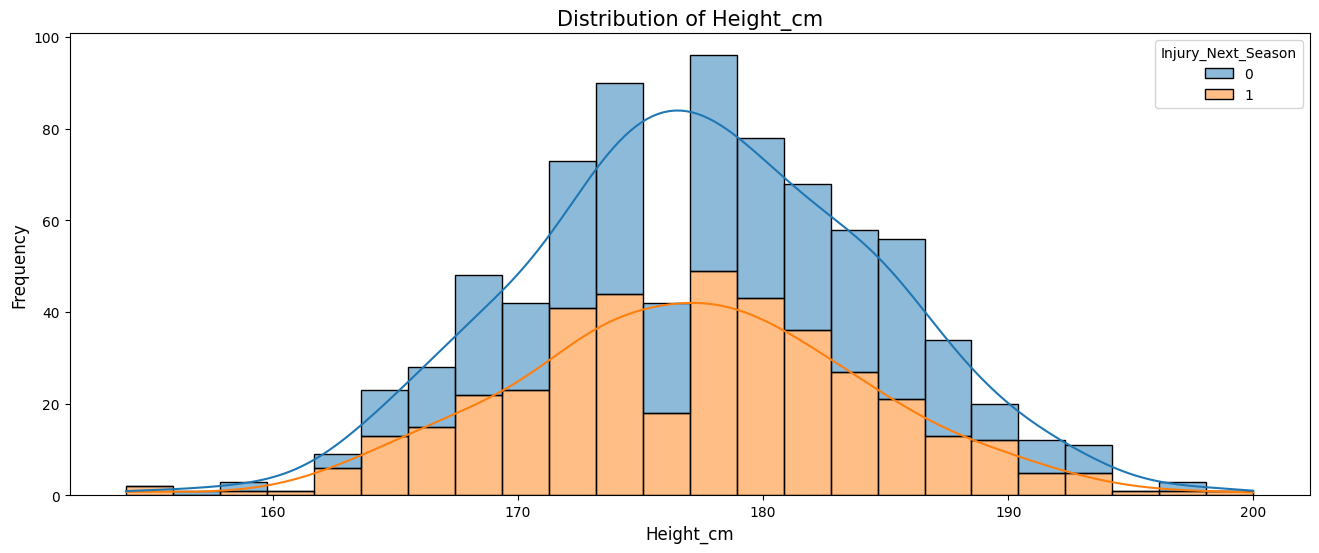

In [93]:
plot_hist('Height_cm','Height_cm',bins = 30)

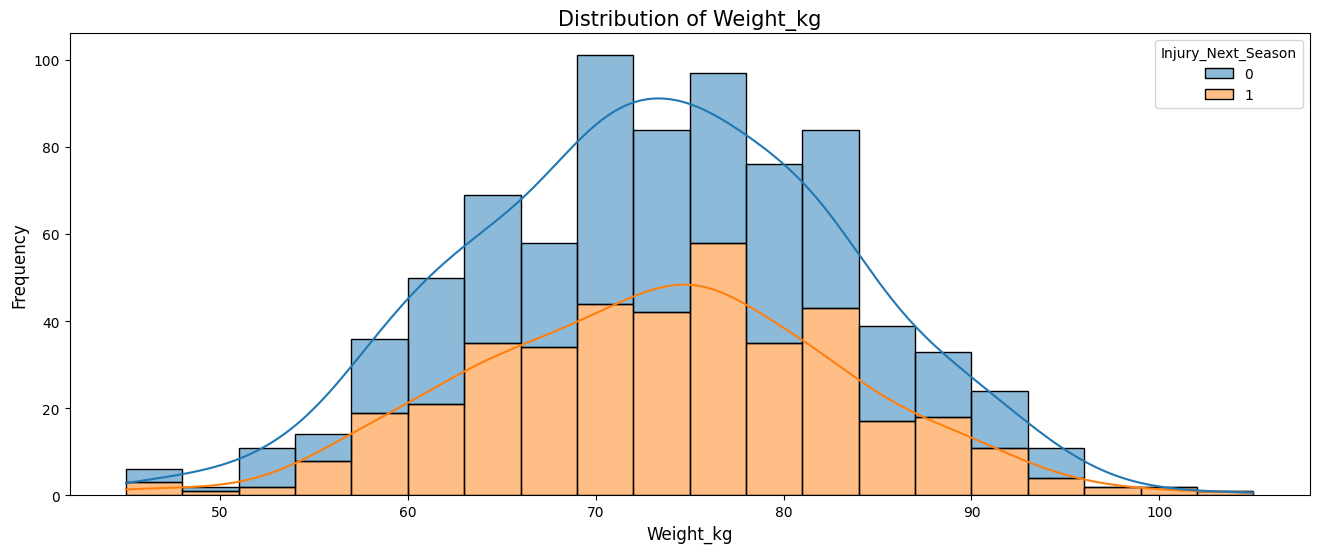

In [94]:
plot_hist('Weight_kg','Weight_kg',bins = 30)

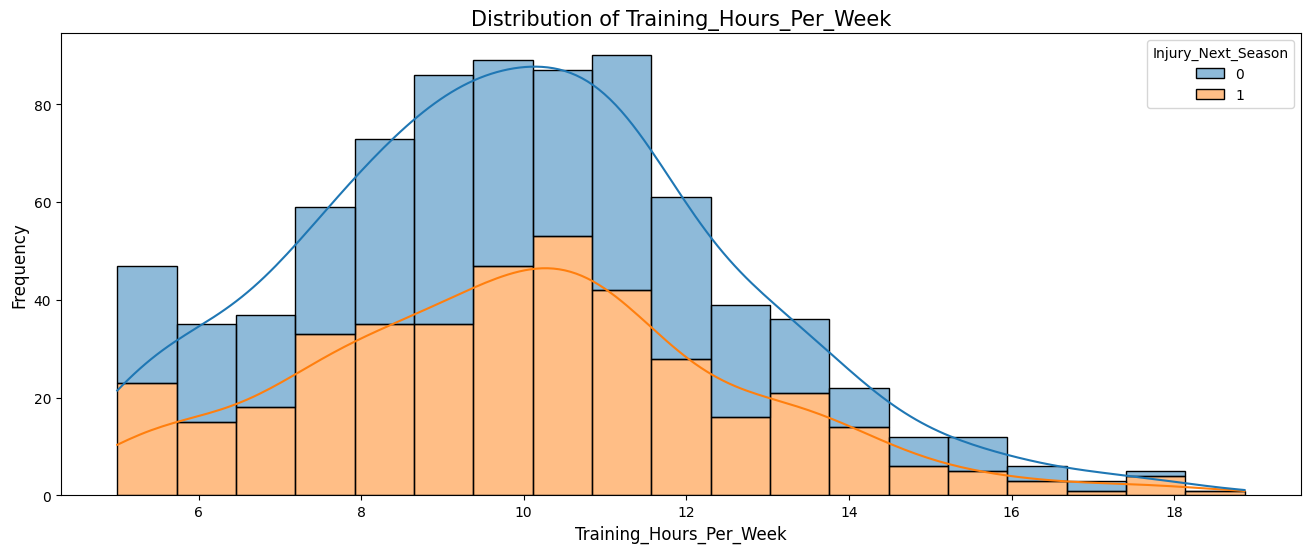

In [95]:
plot_hist('Training_Hours_Per_Week','Training_Hours_Per_Week',bins = 30)

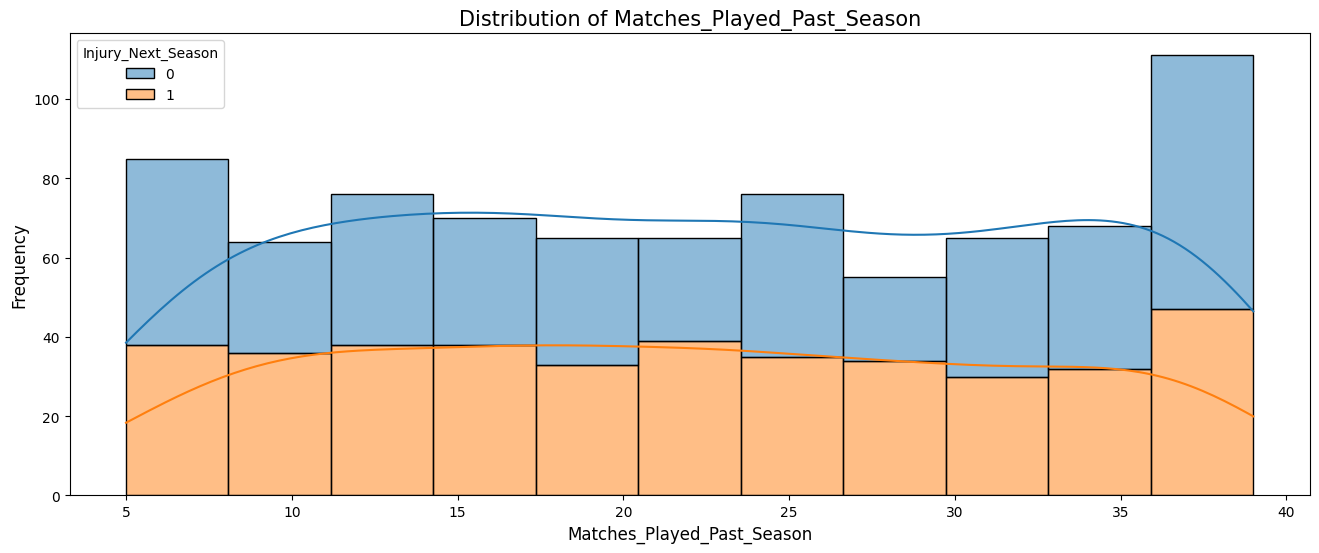

In [96]:
plot_hist('Matches_Played_Past_Season','Matches_Played_Past_Season',bins = 30)

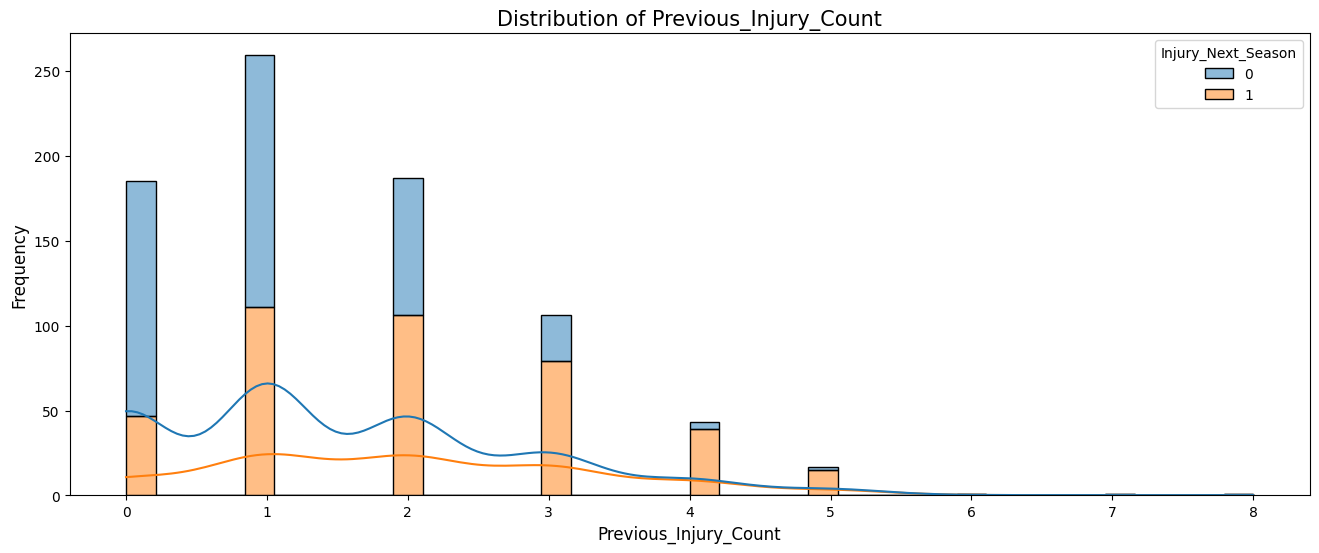

In [97]:
plot_hist('Previous_Injury_Count','Previous_Injury_Count',bins = 30)

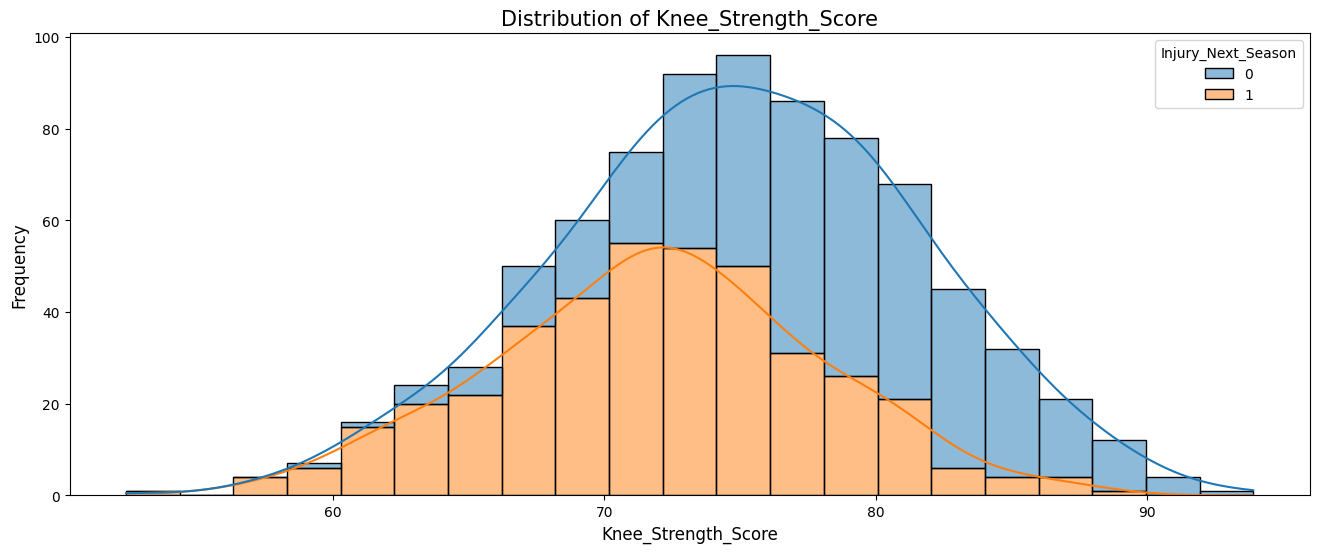

In [98]:
plot_hist('Knee_Strength_Score','Knee_Strength_Score',bins = 30)

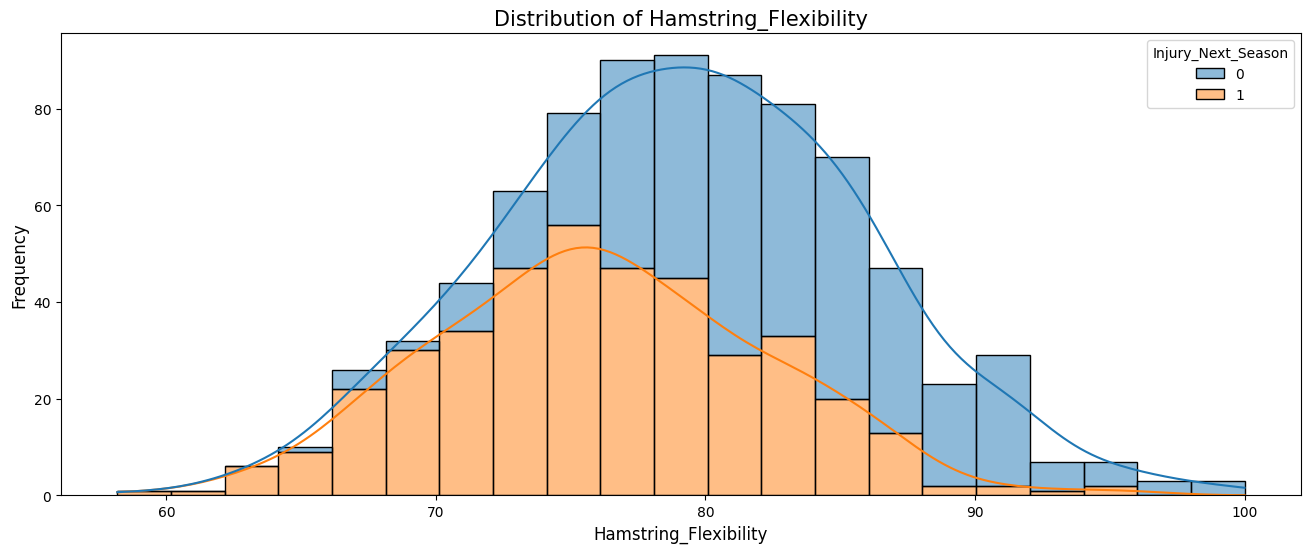

In [99]:
plot_hist('Hamstring_Flexibility','Hamstring_Flexibility',bins = 30)

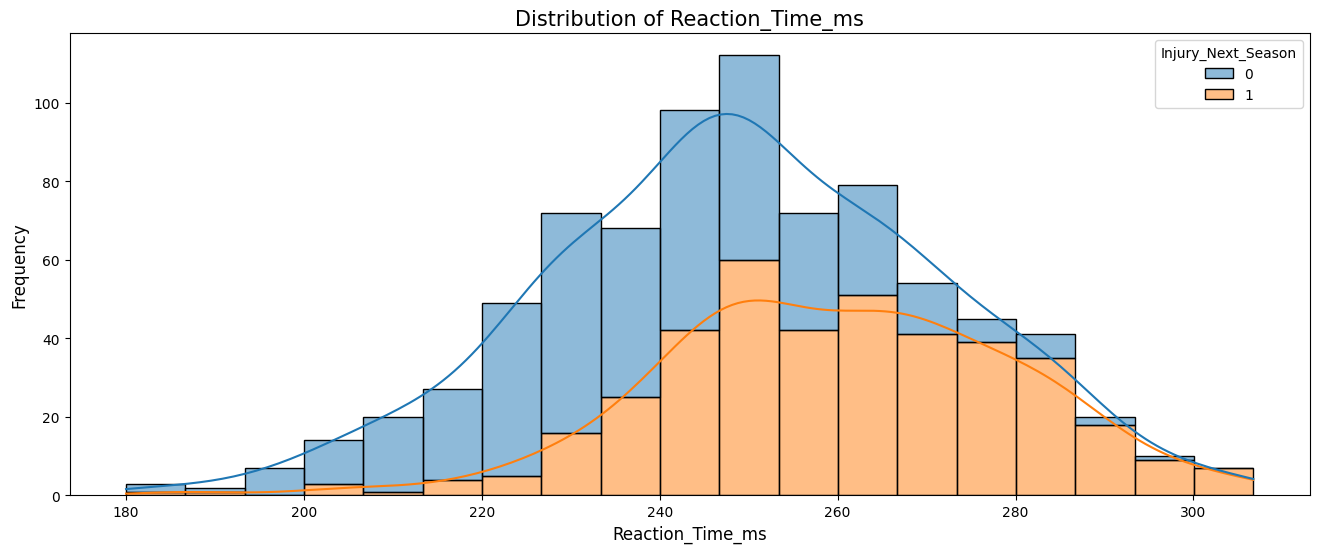

In [100]:
plot_hist('Reaction_Time_ms','Reaction_Time_ms',bins = 30)

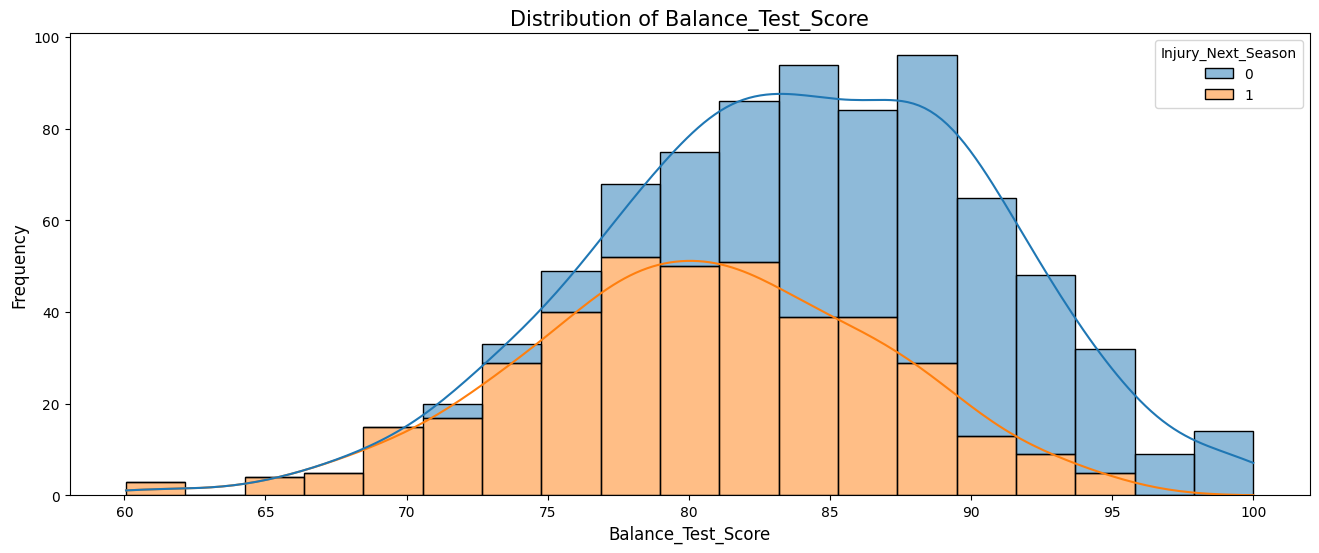

In [101]:
plot_hist('Balance_Test_Score','Balance_Test_Score',bins = 30)

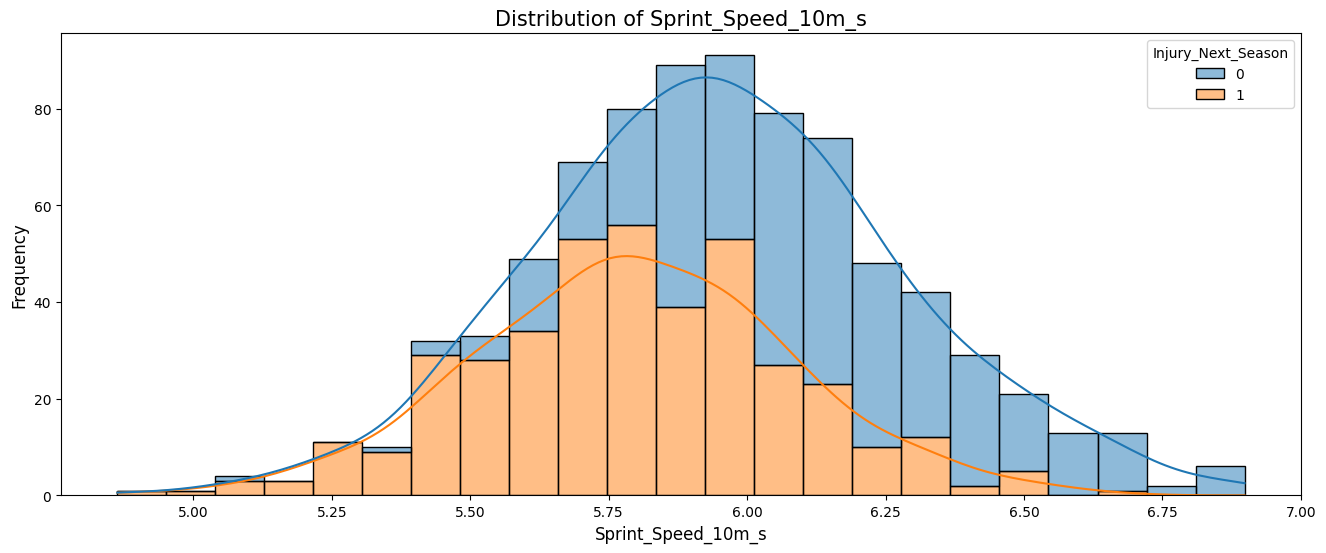

In [102]:
plot_hist('Sprint_Speed_10m_s','Sprint_Speed_10m_s',bins = 30)

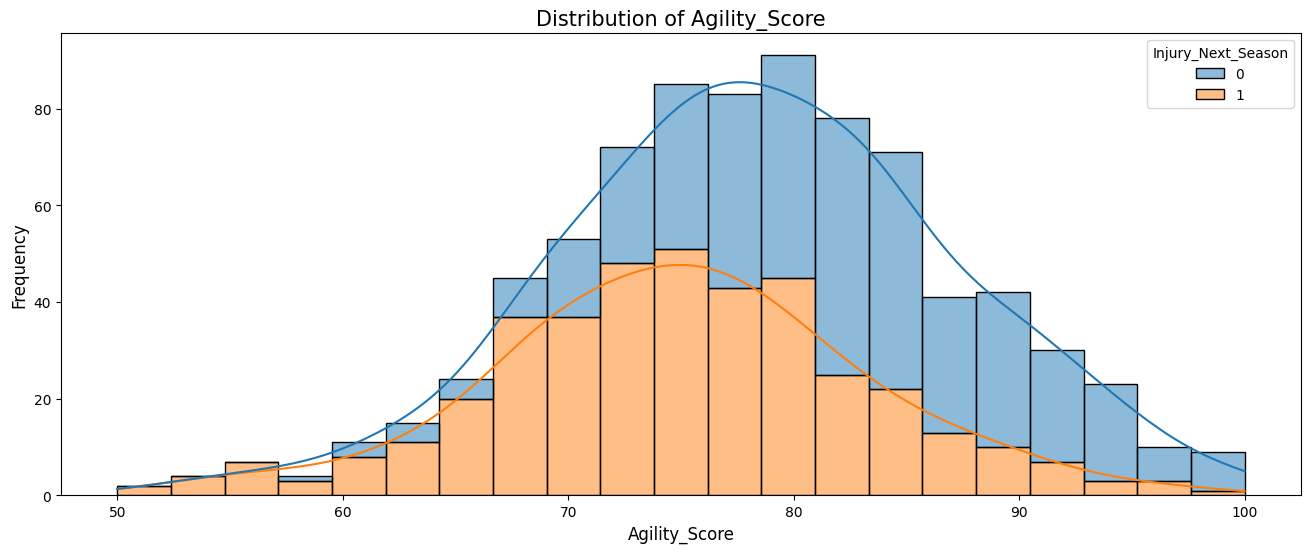

In [103]:
plot_hist('Agility_Score','Agility_Score',bins = 30)

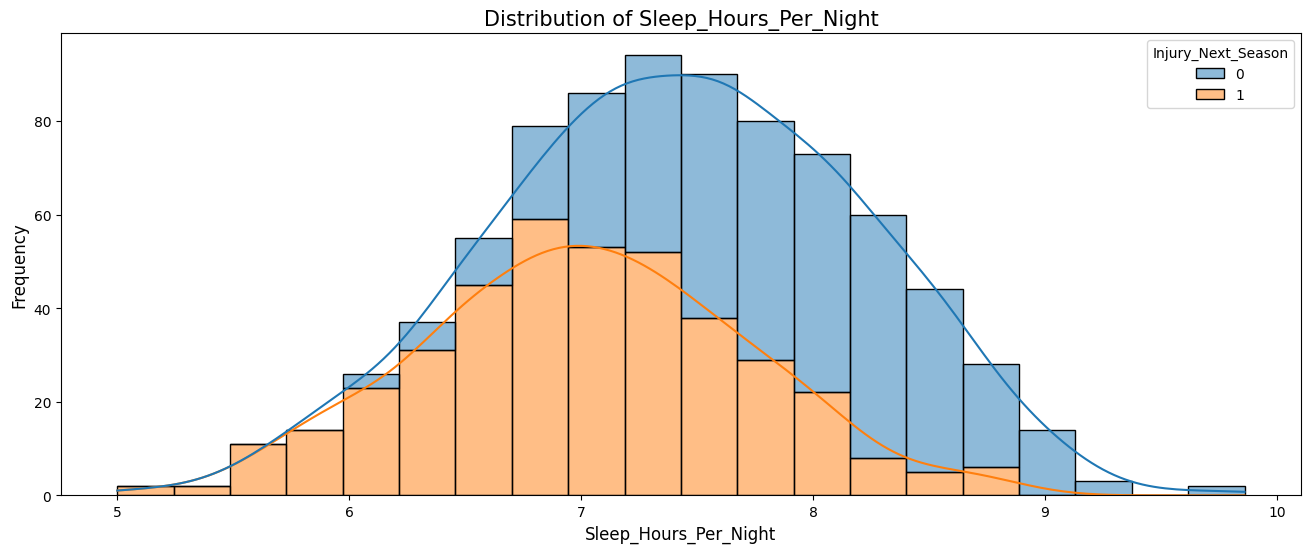

In [104]:
plot_hist('Sleep_Hours_Per_Night','Sleep_Hours_Per_Night',bins = 30)

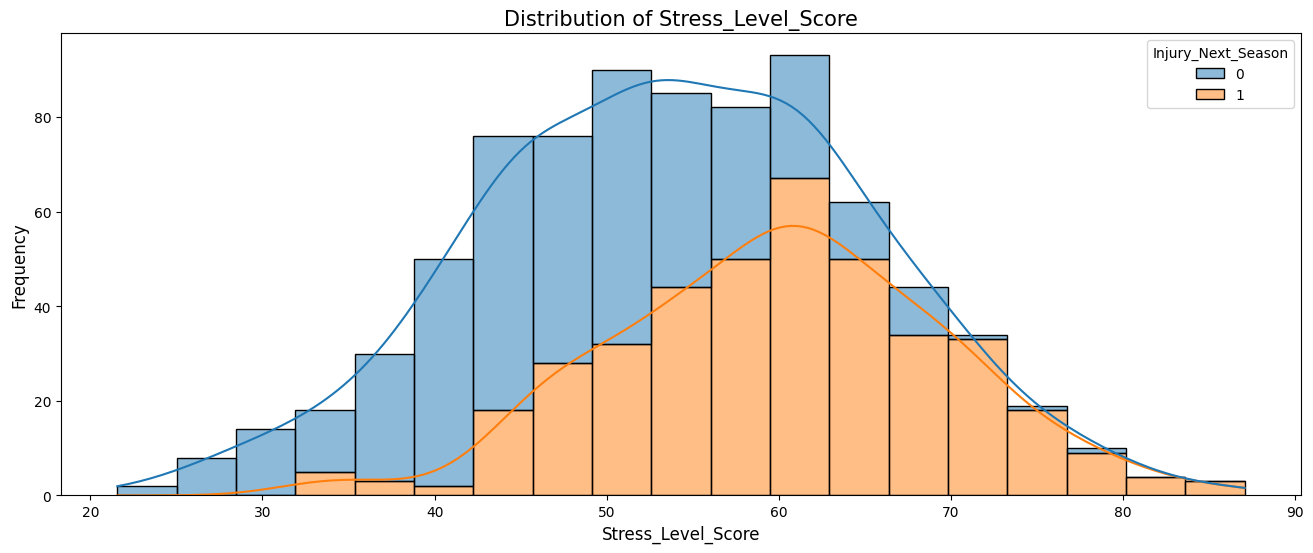

In [105]:
plot_hist('Stress_Level_Score','Stress_Level_Score',bins = 30)

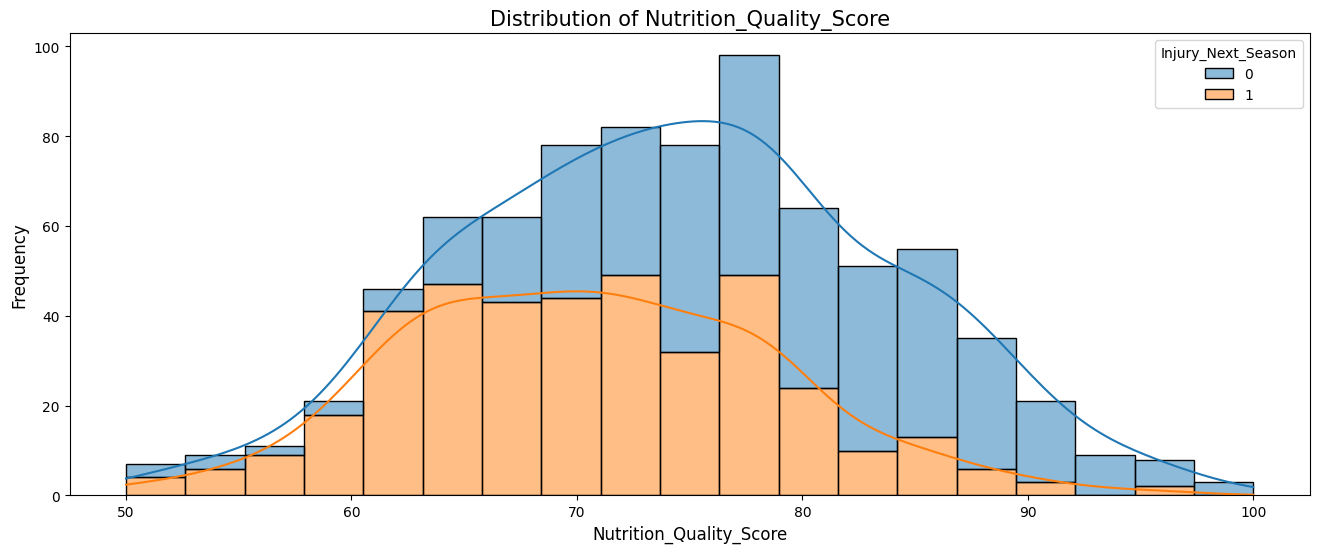

In [106]:
plot_hist('Nutrition_Quality_Score','Nutrition_Quality_Score',bins = 30)

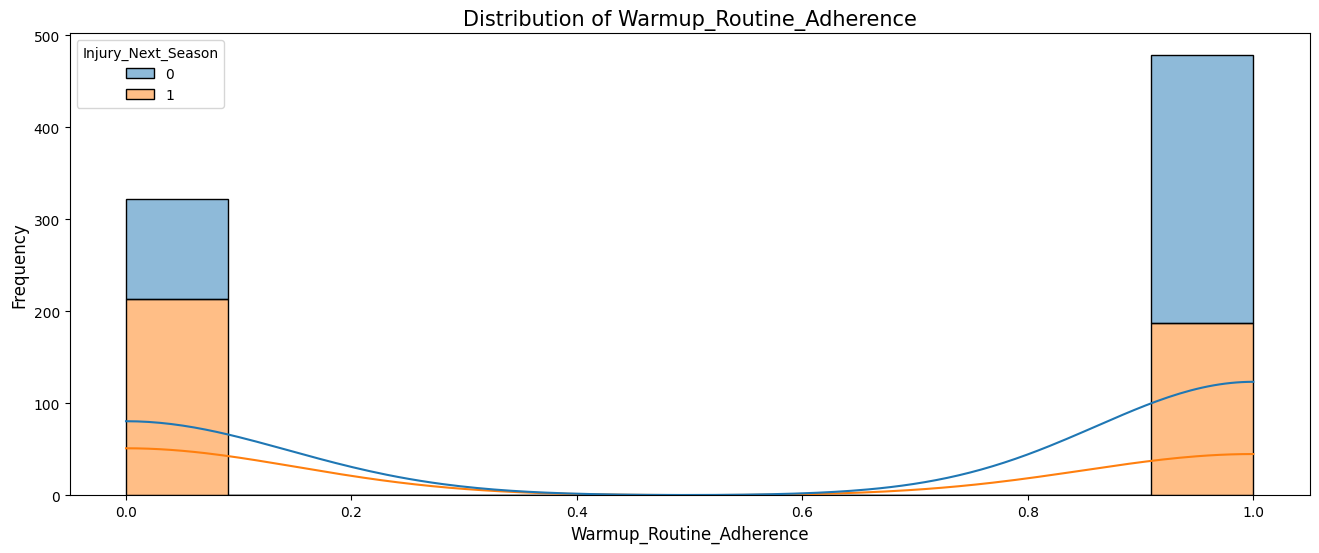

In [107]:
plot_hist('Warmup_Routine_Adherence','Warmup_Routine_Adherence',bins = 30)


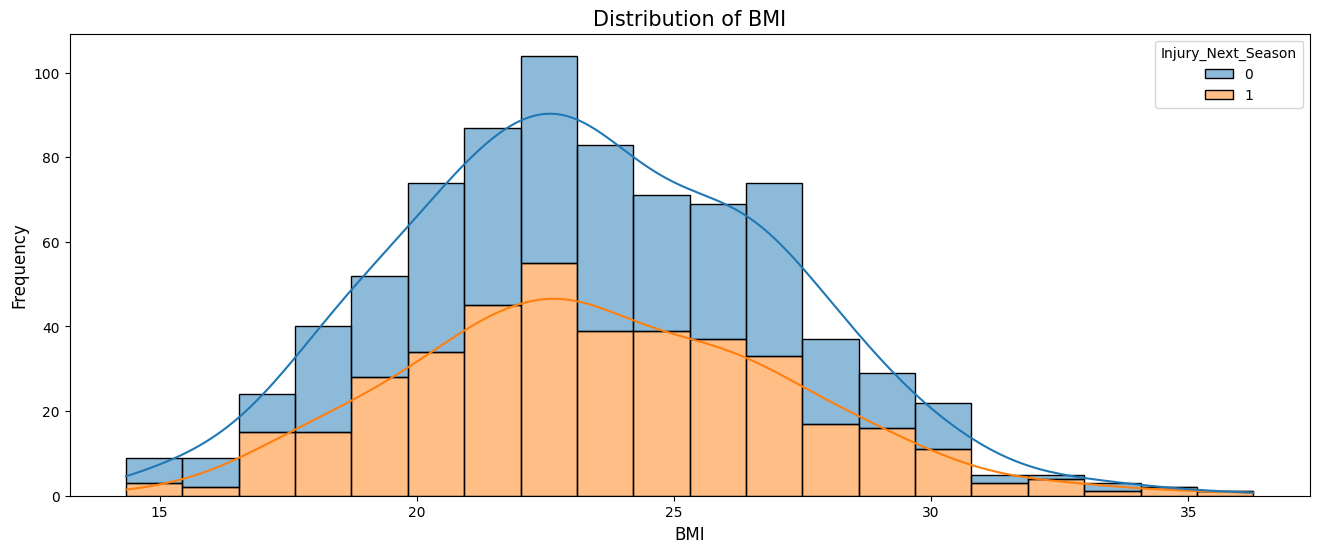

In [108]:
plot_hist('BMI','BMI',bins = 30)

<Axes: xlabel='Position', ylabel='count'>

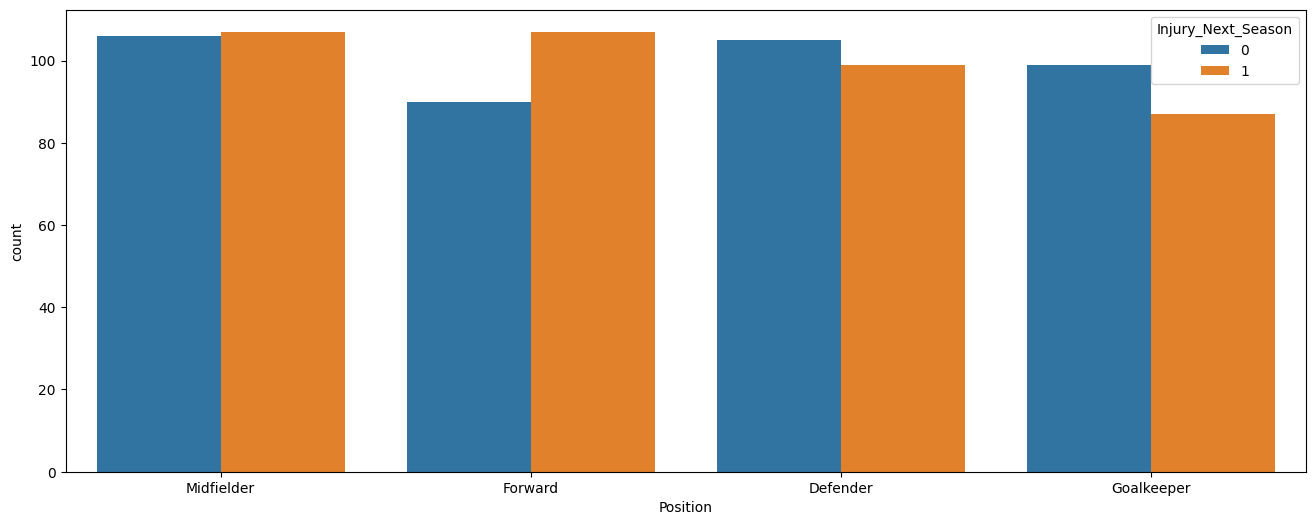

In [109]:
plt.figure(figsize=(16, 6))
sns.countplot(data=df, x='Position',hue = 'Injury_Next_Season',palette='tab10')

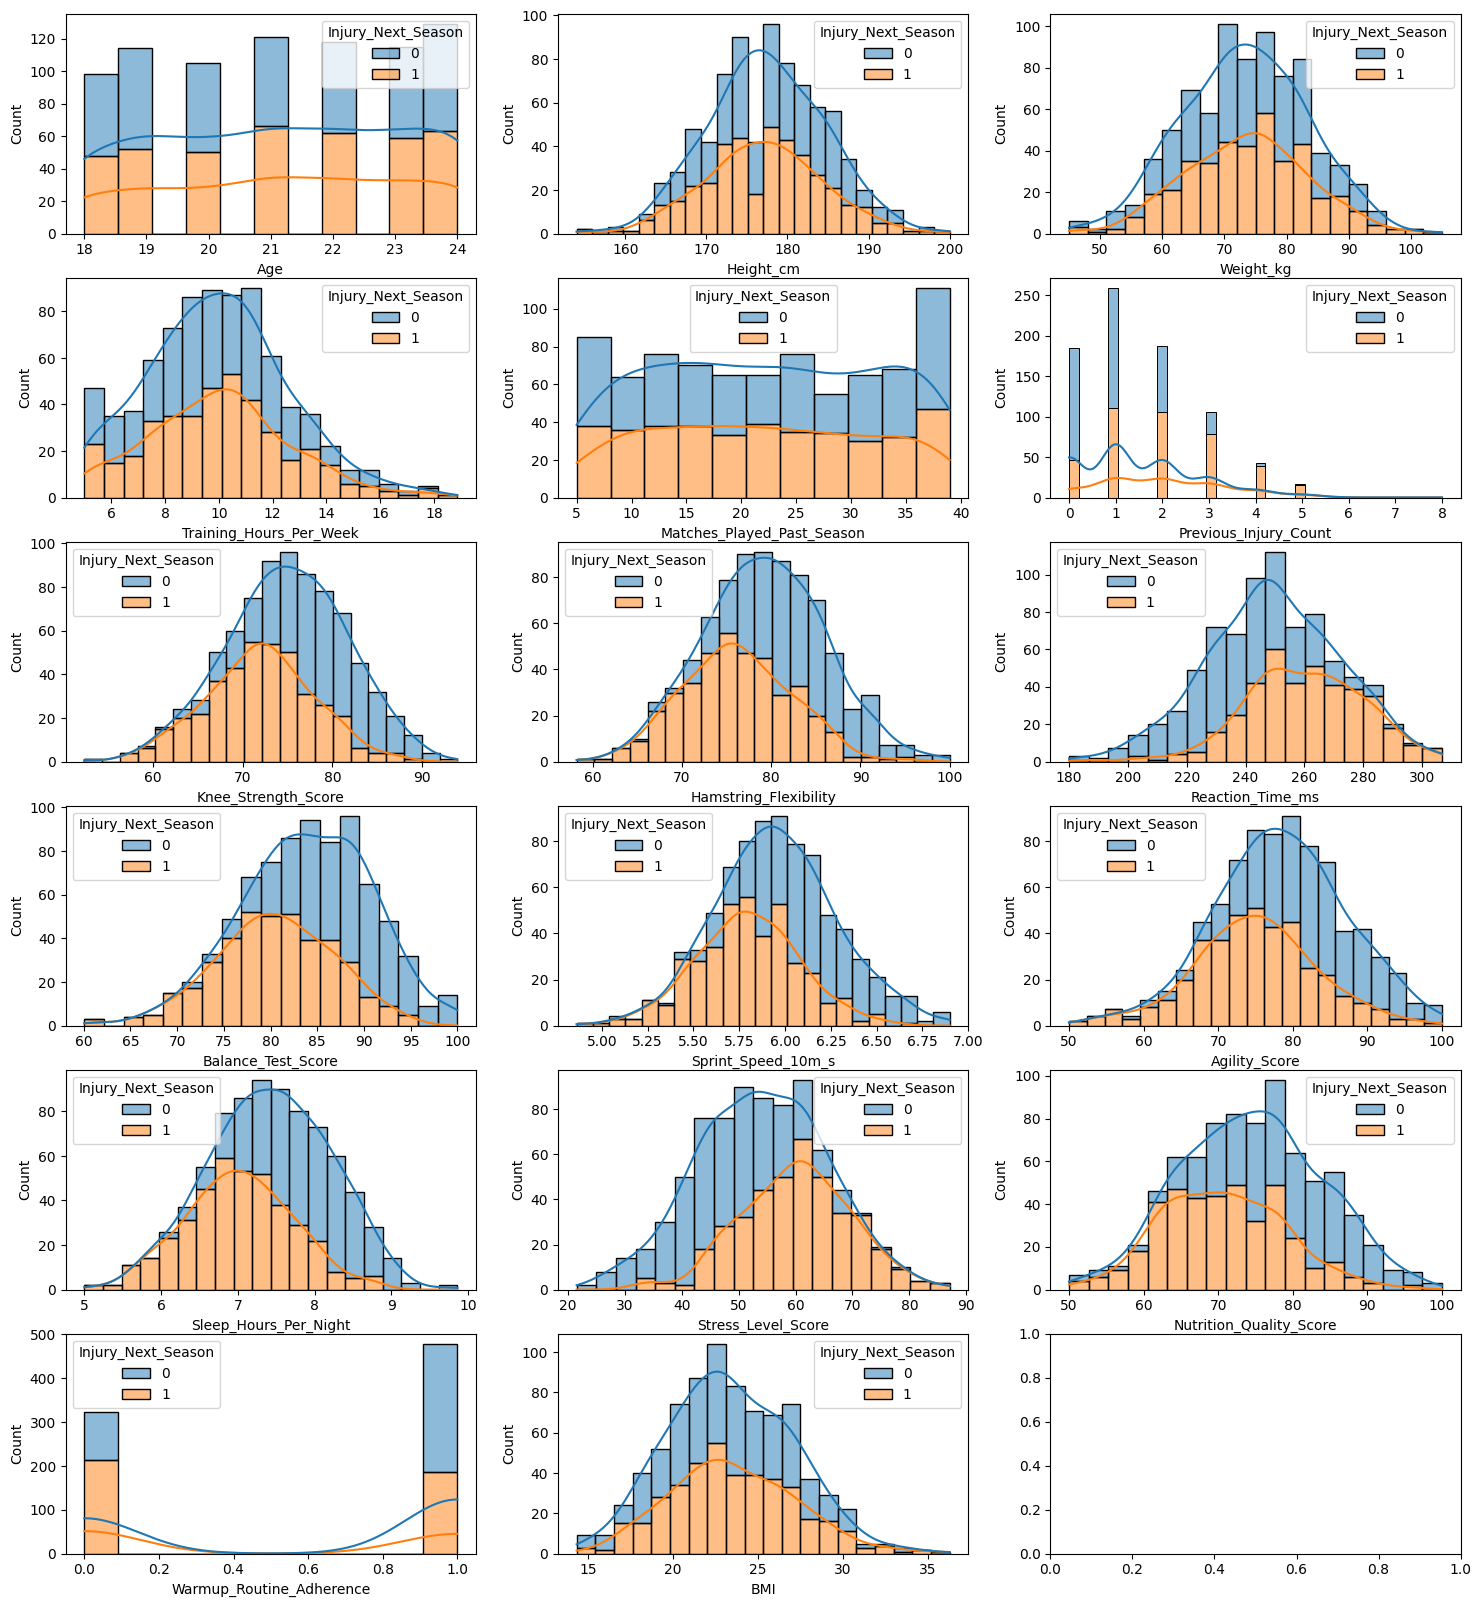

In [110]:
col = ['Age', 'Height_cm', 'Weight_kg', 'Training_Hours_Per_Week',
       'Matches_Played_Past_Season', 'Previous_Injury_Count',
       'Knee_Strength_Score', 'Hamstring_Flexibility', 'Reaction_Time_ms',
       'Balance_Test_Score', 'Sprint_Speed_10m_s', 'Agility_Score',
       'Sleep_Hours_Per_Night', 'Stress_Level_Score',
       'Nutrition_Quality_Score', 'Warmup_Routine_Adherence', 'BMI']

fig, axes = plt.subplots(6, 3, figsize=(18, 20))

axes = axes.flatten()

for i,col in enumerate(col):
  sns.histplot(data = df, x = col,hue ='Injury_Next_Season', ax = axes[i], kde = True,multiple='stack')
plt.show()

# Correlation

<Axes: >

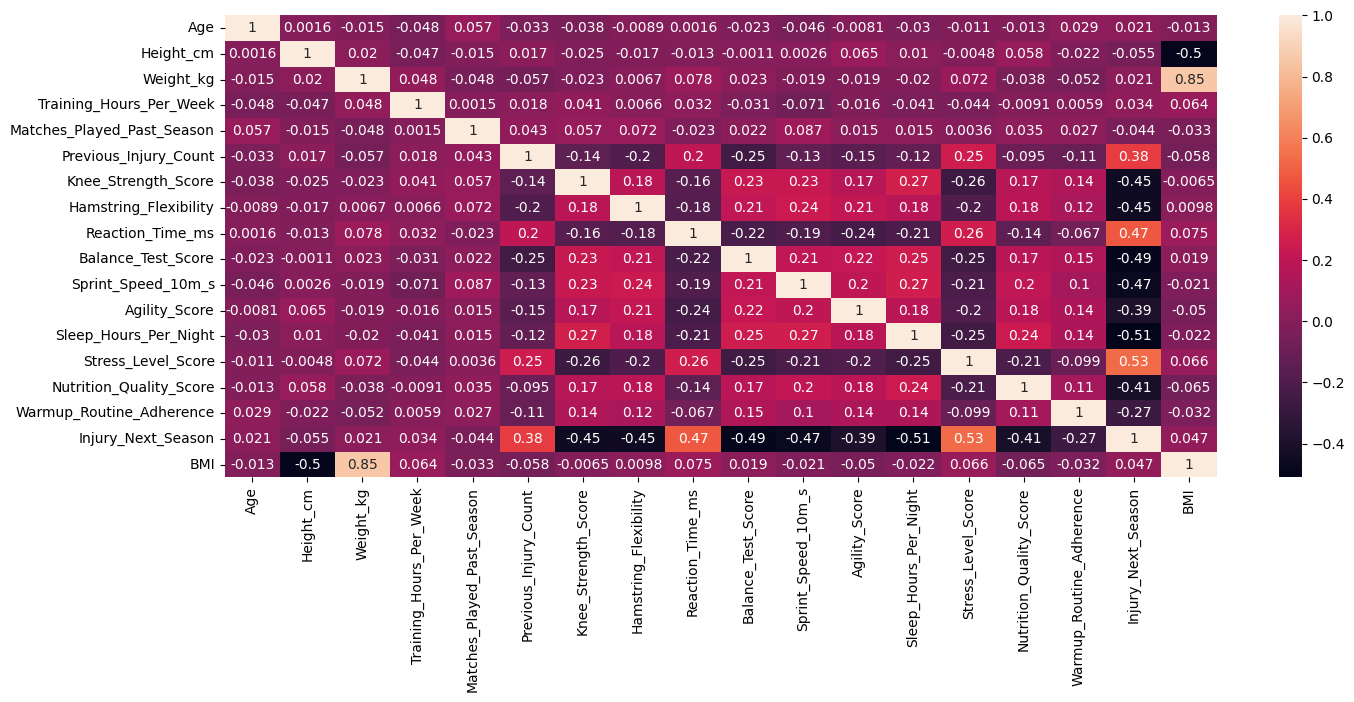

In [111]:
columns = df.drop(columns = ['Position'])
plt.figure(figsize=(16, 6))
sns.heatmap(columns.corr(),annot = True)

<Axes: >

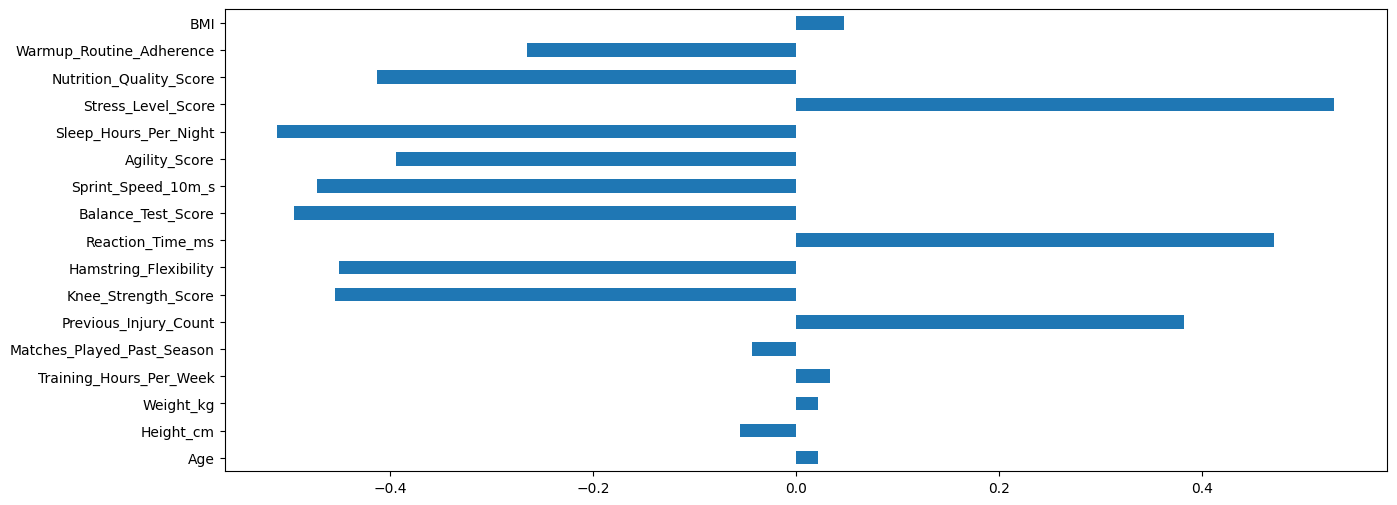

In [112]:
df.drop(['Injury_Next_Season','Position'],axis = 1).corrwith(df['Injury_Next_Season']).plot(kind='barh',figsize=(15, 6))

# Insights



---



* There is more correlation between BMI and weight_kg columns. Its because the the weight is the main factor for calculating BMI


---


**Other columns relation with Our target:**
* Our target column injury next season having high positive relations with stree_level_score and reaction_time_ms as well as high negative correlation with some other columns.


---
BMI, Matches_Played_Past_Season,Training_Hours_Per_Week,weight_kg,height_cm,age are the variables that are not muvh dependend on the targeted variable

In [113]:
df.head()

,Age,Height_cm,Weight_kg,Position,Training_Hours_Per_Week,Matches_Played_Past_Season,Previous_Injury_Count,Knee_Strength_Score,Hamstring_Flexibility,Reaction_Time_ms,Balance_Test_Score,Sprint_Speed_10m_s,Agility_Score,Sleep_Hours_Per_Night,Stress_Level_Score,Nutrition_Quality_Score,Warmup_Routine_Adherence,Injury_Next_Season,BMI
0,22,173,64,Midfielder,11.575308,36,1,77.460279,79.115738,284.487853,91.212476,5.874630,77.599705,8.238293,46.616415,81.472206,1,0,21.383942
1,18,170,67,Midfielder,12.275869,37,2,72.634442,82.541688,250.579249,87.294078,5.796269,94.418987,8.983737,49.368037,81.056677,1,0,23.183391
2,22,186,75,Forward,12.254896,12,2,77.064490,75.943631,269.119918,83.440688,5.731209,70.179176,7.229193,43.132808,64.877457,0,1,21.678807
3,20,172,62,Defender,9.006678,11,1,82.810232,73.878324,226.376412,87.591894,6.220212,83.473824,7.681029,51.528529,89.824744,1,0,20.957274
4,18,172,94,Midfielder,12.683668,10,2,76.772859,76.653043,229.021042,83.125161,5.385958,87.037256,6.728091,52.379718,71.569197,0,1,31.773932


In [114]:
df_encoded = pd.get_dummies(df,columns = ['Position'],drop_first = True)


In [115]:
x = df_encoded.drop(columns = ['Injury_Next_Season'],axis = 1)
y = df_encoded['Injury_Next_Season']


In [116]:
x.shape

(800, 20)

In [117]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

In [118]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_train_scaled = ss.fit_transform(x_train)
x_test_scaled= ss.transform(x_test)

In [119]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train_scaled,y_train)


LogisticRegression()

In [120]:
model.score(x_train_scaled,y_train)

0.965625

In [121]:
y_pred = model.predict(x_test_scaled)
y_train_pred = model.predict(x_train_scaled)

In [122]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print("Training Results \n ===============================================================")
print("Accuracy score is :",accuracy_score(y_train,y_train_pred))
clf_repo = pd.DataFrame(classification_report(y_train,y_train_pred,output_dict=True))
print(f"Classification report is :\n\n{clf_repo}")
print(f"\nConfusion matrix: \n {confusion_matrix(y_train,y_train_pred)}")


print("Testing Results \n ===============================================================")
print("Accuracy score is :",accuracy_score(y_test,y_pred))
clf_repo = pd.DataFrame(classification_report(y_test,y_pred,output_dict = True))
print(f"Classification report is :\n\n{clf_repo}")
print(f"\nConfusion matrix: \n {confusion_matrix(y_test,y_pred)}")

Training Results 
Accuracy score is : 0.965625
Classification report is :

                    0           1  accuracy   macro avg  weighted avg
precision    0.965625    0.965625  0.965625    0.965625      0.965625
recall       0.965625    0.965625  0.965625    0.965625      0.965625
f1-score     0.965625    0.965625  0.965625    0.965625      0.965625
support    320.000000  320.000000  0.965625  640.000000    640.000000

Confusion matrix: 
 [[309  11]
 [ 11 309]]
Testing Results 
Accuracy score is : 0.9375
Classification report is :

                   0          1  accuracy   macro avg  weighted avg
precision   0.972973   0.906977    0.9375    0.939975      0.939975
recall      0.900000   0.975000    0.9375    0.937500      0.937500
f1-score    0.935065   0.939759    0.9375    0.937412      0.937412
support    80.000000  80.000000    0.9375  160.000000    160.000000

Confusion matrix: 
 [[72  8]
 [ 2 78]]
